In [2020]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helper as t
pd.options.mode.chained_assignment = None  # default='warn'

from IPython import display
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',154)

df = pd.read_csv('./listings.csv')
reviews = pd.read_csv('./reviews.csv')
metadata = pd.read_csv('./listing_metadata.csv')

In [2021]:
#df.columns

In [2022]:
#metadata.sort_values(by='Label')

#### https://www.kaggle.com/airbnb/seattle

In [2023]:
df1 = df[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'property_type', 'room_type','host_response_time',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities','guests_included','cancellation_policy',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','reviews_per_month',
       'review_scores_value', 'instant_bookable','price']]

In [2024]:
def convert_to_float(r):
    result = str(r).replace("$","").replace(",","").replace("%","")
    return round(float(result),2)

def bool_to_int(b):
    if b == 't':
        result = 1
    elif b == 'f':
        result = 0
    else: 
        result = None
    return result
    

In [2025]:
col_list = ['price','host_response_rate','host_acceptance_rate']
bool_list = ['host_is_superhost',
             'instant_bookable']

for col in col_list:
    df1[col] = df1[col].apply(convert_to_float)
    
for col in bool_list:
    df1[col] = df1[col].apply(bool_to_int)
    


In [2026]:
df1.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price
count,3295.000000,3045.000000,3816.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3191.000000,3162.000000,3818.000000,3818.000000
mean,94.886798,99.967159,0.203878,3.349398,1.259469,1.307712,1.735394,1.672603,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,2.078919,9.452245,0.154793,127.976166
std,11.866705,1.812201,0.402932,1.977599,0.590369,0.883395,1.139480,1.311040,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,1.822348,0.750259,0.361755,90.250022
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,0.020000,2.000000,0.000000,20.000000
25%,98.000000,100.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,0.695000,9.000000,0.000000,75.000000
50%,100.000000,100.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000,10.000000,0.000000,100.000000
75%,100.000000,100.000000,0.000000,4.000000,1.000000,2.000000,2.000000,2.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,10.000000,0.000000,150.000000
max,100.000000,100.000000,1.000000,16.000000,8.000000,7.000000,15.000000,15.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000,10.000000,1.000000,1000.000000


In [2027]:
df1.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,property_type,room_type,host_response_time,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,cancellation_policy,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price
0,96.0,100.0,0.0,Apartment,Entire home/apt,within a few hours,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,moderate,95.0,10.0,10.0,10.0,10.0,9.0,4.07,10.0,0,85.0
1,98.0,100.0,1.0,Apartment,Entire home/apt,within an hour,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,strict,96.0,10.0,10.0,10.0,10.0,10.0,1.48,10.0,0,150.0
2,67.0,100.0,0.0,House,Entire home/apt,within a few hours,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",10,strict,97.0,10.0,10.0,10.0,10.0,10.0,1.15,10.0,0,975.0
3,NaN,NaN,0.0,Apartment,Entire home/apt,NaN,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",1,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.0
4,100.0,NaN,0.0,House,Entire home/apt,within an hour,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",6,strict,92.0,9.0,9.0,10.0,10.0,9.0,0.89,9.0,0,450.0


In [2028]:
#df1.columns

In [2029]:
def get_all(amenities):
    result = []
    for i in amenities:
        result.append(i)
    return result

def clean(x):
    x = x.replace('"','').replace("{",'').replace("}","")
    result = [word for word in x.split(',')]
    return result

def parse_result(r):
    amenities_list = []
    for i in r:
        for j in i:
            if j:
                amenities_list.append(j)
    return list(set(amenities_list))   

In [2030]:
df1['amenities'] = df1['amenities'].apply(clean)

In [2031]:
all_amenities_list = list(df1['amenities'].apply(get_all))

In [2032]:
all_possible = parse_result(all_amenities_list)

In [2033]:
#all_possible

In [2034]:
def summarize_data(df):
    '''
    INPUT 
        df - a dataframe holding the amenities column
        
    OUTPUT
        study_df - a dataframe with the amenities count
    '''
    study = df['amenities'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'amenities': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', all_possible)
    
    study_df.set_index('method', inplace=True)
    props_study_df = study_df/df.shape[0] 
    return props_study_df
    
amenities_df = summarize_data(df1)

<AxesSubplot:>

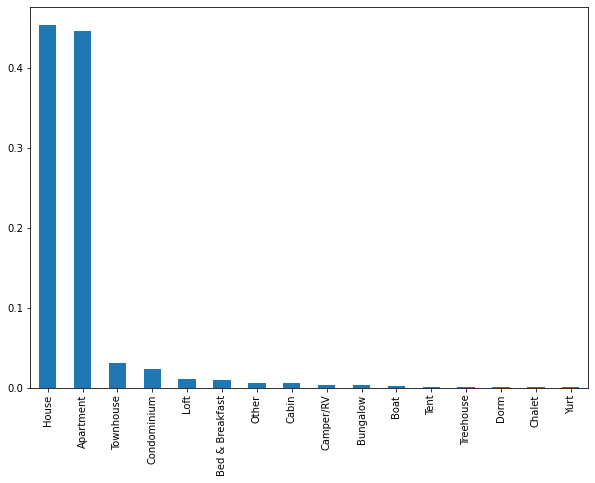

In [2035]:
((df1['property_type'].value_counts())/df1.shape[0]).plot(kind='bar',figsize=(10,7))

<AxesSubplot:>

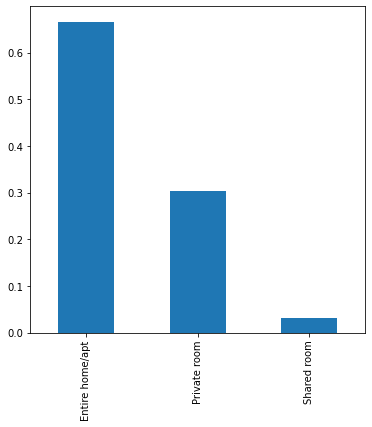

In [2036]:
((df1['room_type'].value_counts())/df1.shape[0]).plot(kind='bar',figsize=(6,6))

<AxesSubplot:>

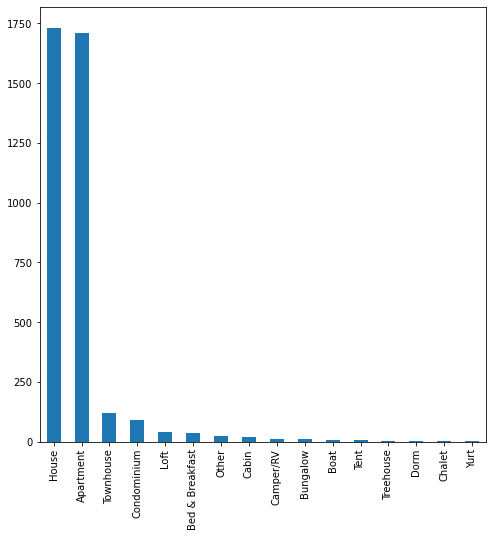

In [2037]:
df.property_type.value_counts().plot(kind='bar',figsize=(8,8))

<AxesSubplot:title={'center':'Amenities Summary'}, xlabel='method'>

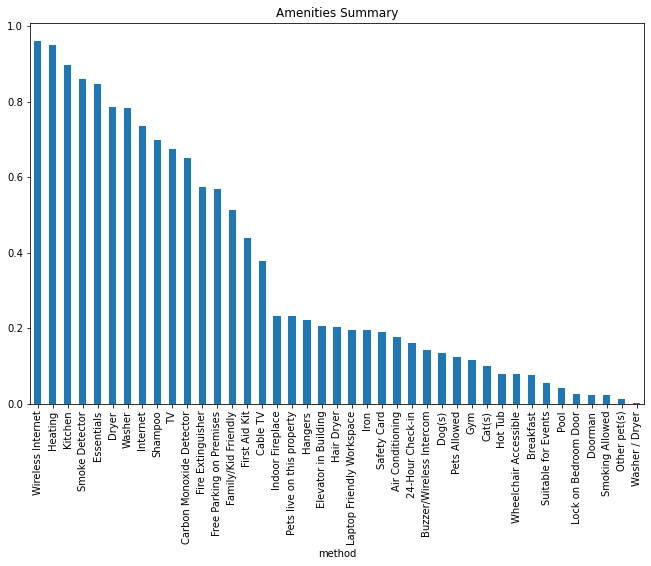

In [2038]:
amenities_df.plot(kind='bar', figsize=(11,7),title="Amenities Summary",legend=None)

### Create Dummy Variables for Amenities 

In [2039]:
df_fit = df1.join(df1.pop('amenities').str.join('|').str.get_dummies())

In [2040]:
df_fit.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,property_type,room_type,host_response_time,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,96.0,100.0,0.0,Apartment,Entire home/apt,within a few hours,4,1.0,1.0,1.0,Real Bed,2,moderate,95.0,10.0,10.0,10.0,10.0,9.0,4.07,10.0,0,85.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,98.0,100.0,1.0,Apartment,Entire home/apt,within an hour,4,1.0,1.0,1.0,Real Bed,1,strict,96.0,10.0,10.0,10.0,10.0,10.0,1.48,10.0,0,150.0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,67.0,100.0,0.0,House,Entire home/apt,within a few hours,11,4.5,5.0,7.0,Real Bed,10,strict,97.0,10.0,10.0,10.0,10.0,10.0,1.15,10.0,0,975.0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
3,NaN,NaN,0.0,Apartment,Entire home/apt,NaN,3,1.0,0.0,2.0,Real Bed,1,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1
4,100.0,NaN,0.0,House,Entire home/apt,within an hour,6,2.0,3.0,3.0,Real Bed,6,strict,92.0,9.0,9.0,10.0,10.0,9.0,0.89,9.0,0,450.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1


## Fit Linear Model

In [2041]:
nans = (df_fit.isnull().sum())

In [2042]:
nans.sort_values(ascending=False).nlargest(18)

host_acceptance_rate           773
review_scores_checkin          658
review_scores_accuracy         658
review_scores_value            656
review_scores_location         655
review_scores_cleanliness      653
review_scores_communication    651
review_scores_rating           647
reviews_per_month              627
host_response_rate             523
host_response_time             523
bathrooms                       16
bedrooms                         6
host_is_superhost                2
beds                             1
property_type                    1
Washer                           0
Iron                             0
dtype: int64

### Remove outliers


In [2043]:
drop_list = ['Camper/RV','Boat','Tent','Dorm','Other','Treehouse','Yurt']
filtr1 = (df_fit['price'] < 999) & (df_fit['price'] > 45) & (
          df_fit['bathrooms'] > 0) & (df_fit['bedrooms'] > 0) & (df_fit['accommodates'] < 12) & (
          df_fit['beds'] < 10)
filtr2 = ~df_fit['property_type'].isin(drop_list)
df_fit = df_fit[filtr1 & filtr2]

In [2044]:
df_fit = df_fit.copy()

### Drop rows from key columns with null values
### Impute values for remaining null values

In [2045]:
col_list = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
            'review_scores_communication','review_scores_checkin',
            'review_scores_location','review_scores_value']
mode_list = ['host_response_time','bathrooms','bedrooms','host_response_time',
             'property_type','beds','host_is_superhost','instant_bookable']
mean_list = ['host_response_rate','host_acceptance_rate','reviews_per_month']

df_fit.dropna(subset=col_list,axis=0,inplace=True)  

for col in mode_list:
    df_fit[col].fillna((df_fit[col].mode()[0]), inplace=True)
    
for col in mean_list:
    df_fit[col].fillna(round(df_fit[col].mean(),1), inplace=True)

In [2046]:
df_fit.isnull().sum().sum()

0

In [2047]:
#df_fit.property_type.value_counts()

In [2048]:
#df_fit.sort_values(by='price').tail()

In [2049]:
df_fit.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
count,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000,2599.000000
mean,95.177145,99.961524,0.247403,3.529050,1.276260,1.449019,1.799538,1.778376,94.664871,9.651020,9.574836,9.796075,9.819546,9.624086,1.996249,9.456714,0.157368,133.200846,0.141978,0.177761,0.070412,0.140823,0.410158,0.666025,0.103501,0.138515,0.025010,0.805694,0.203155,0.858792,0.565602,0.596383,0.464794,0.602539,0.117353,0.187380,0.194306,0.962678,0.077722,0.248557,0.752212,0.178915,0.900731,0.166987,0.015391,0.015006,0.131974,0.240862,0.046941,0.206233,0.727972,0.873798,0.020777,0.058099,0.704117,0.802616,0.000385,0.084263,0.972297
std,10.847911,1.961539,0.431586,1.857465,0.578398,0.759592,1.081470,1.315851,6.601581,0.671788,0.782604,0.598278,0.550165,0.609690,1.751075,0.748846,0.364218,86.940927,0.349094,0.382385,0.255889,0.347906,0.491957,0.471722,0.304671,0.345506,0.156184,0.395741,0.402424,0.348303,0.495773,0.490717,0.498855,0.489467,0.321902,0.390291,0.395741,0.189586,0.267785,0.432260,0.431811,0.383355,0.299080,0.373036,0.123124,0.121599,0.338527,0.427689,0.211553,0.404678,0.445090,0.332141,0.142665,0.233976,0.456527,0.398101,0.019615,0.277836,0.164152
min,17.000000,0.000000,0.000000,1.000000,0.500000,1.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,6.000000,0.020000,2.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.200000,100.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,0.650000,9.000000,0.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,100.000000,100.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.460000,10.000000,0.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.

In [2050]:
dfc = df_fit[['host_is_superhost','bathrooms','beds','review_scores_rating','bedrooms',
              'accommodates','instant_bookable','host_acceptance_rate','Suitable for Events',
              'price','host_response_rate','24-Hour Check-in','Air Conditioning','Breakfast','Pets Allowed',
              'Cable TV','Cat(s)','Dog(s)','Dryer','Fire Extinguisher','Essentials',
              'Pets live on this property','Pool','Shampoo','Safety Card','Smoke Detector','Smoking Allowed','Washer',
              'Family/Kid Friendly','Free Parking on Premises','Gym','Hair Dryer','Hangers','Heating','Hot Tub',
              'Indoor Fireplace','Internet','Iron','Kitchen','Laptop Friendly Workspace','Lock on Bedroom Door']]

In [2051]:
rank_order = dfc.corr(method='pearson').review_scores_rating.sort_values(ascending=True)

In [2052]:
#rank_order

<AxesSubplot:title={'center':'Correlation of Amenities With Review Score'}>

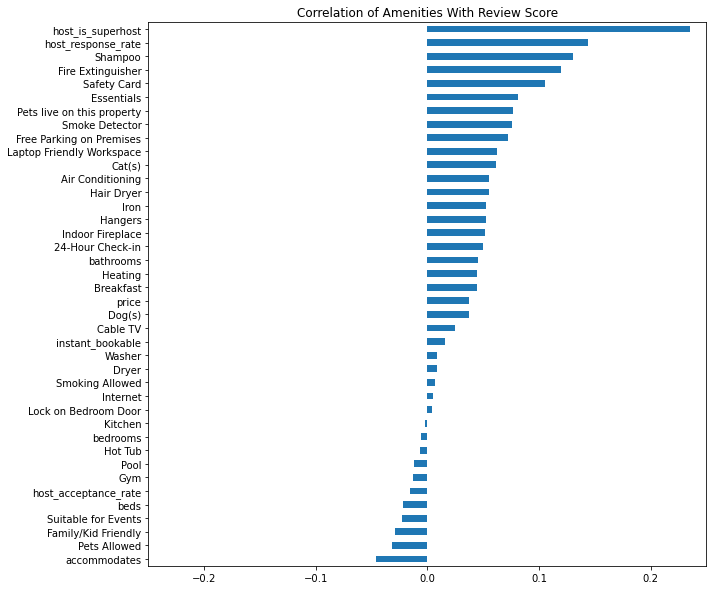

In [2053]:
rank_order.drop(labels='review_scores_rating',inplace=True)
rank_order.plot(kind='barh',figsize=(10,10),xlim=(-.25,.25),title='Correlation of Amenities With Review Score')


In [2054]:
df_fit.select_dtypes(include='object').head()

,property_type,room_type,host_response_time,bed_type,cancellation_policy
0,Apartment,Entire home/apt,within a few hours,Real Bed,moderate
1,Apartment,Entire home/apt,within an hour,Real Bed,strict
2,House,Entire home/apt,within a few hours,Real Bed,strict
4,House,Entire home/apt,within an hour,Real Bed,strict
5,House,Private room,within an hour,Real Bed,strict


In [2055]:
df_model = df_fit.copy()

In [2056]:
cat_df = df_fit.select_dtypes(include='object') 
#Create a copy of the dataframe
cat_df_copy = cat_df.copy()
#Pull a list of the column names of the categorical variables
cat_cols_lst = list(cat_df.columns)

def create_dummy_df(df, cat_cols, dummy_na):
    for col in cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, 
                            dummy_na=dummy_na)], axis=1)
        except:
            print('error')
            continue
    return df

In [2057]:
#cat_cols_lst

In [2070]:
def fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.2, rand_state=49):

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)
    dfmod = df
    
    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    mean_abs_err = mean_absolute_error(y_test, y_test_preds)

    return dfmod, mean_abs_err, test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [2071]:
#Fit Model

dfmodel, err, test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(
                                      df_model,'review_scores_rating', cat_cols_lst, dummy_na=False)

## Model Results

In [2072]:
print('Mean Absolute Error:', round(err,2))
print("Rsquared score-training data: ", round(train_score,5))
print("Rsquared score-test data: ", round(test_score,5))

Mean Absolute Error: 2.51
Rsquared score-training data:  0.67029
Rsquared score-test data:  0.65842
